<a href="https://colab.research.google.com/github/Liu-Jihan/2103/blob/main/NST2062_Technical_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Technical Assignment #1

## Problem 1: API Integration & Digit Recognition (40 points)

**Objective**:
Please load (or train) a MNIST model and integrate it with an external API (or simulated function) that supplies a handwritten digit image. You shoudl then  preprocess the image, run a prediction, and compare the model's output with the true label (which you (or an API) can provide).

**Tasks**:

1. Model Setup:

Option A: Load a provided pre-trained model.

Option B: Train a simple CNN on the MNIST dataset.

2. API/Sample Function:

Create or use a simulated API function that returns a 28x28 handwritten digit image (and its true label).

(Tip: Use random selection from the MNIST test set to simulate an API response.)

3. Prediction & Visualization:

Preprocess the received image so it matches the model's input requirements.
Use the model to predict the digit.

Display the image along with both the model's prediction and the true label.

Briefly comment on any discrepancies.

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           5,130 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 10)                  │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 669,706 (2.55 MB)

 Trainable params: 669,706 (2.55 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 0.8651 - loss: 0.4536
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.9670 - loss: 0.1077
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.9772 - loss: 0.0736
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 16ms/step - accuracy: 0.9832 - loss: 0.0527
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 0.9848 - loss: 0.0457
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


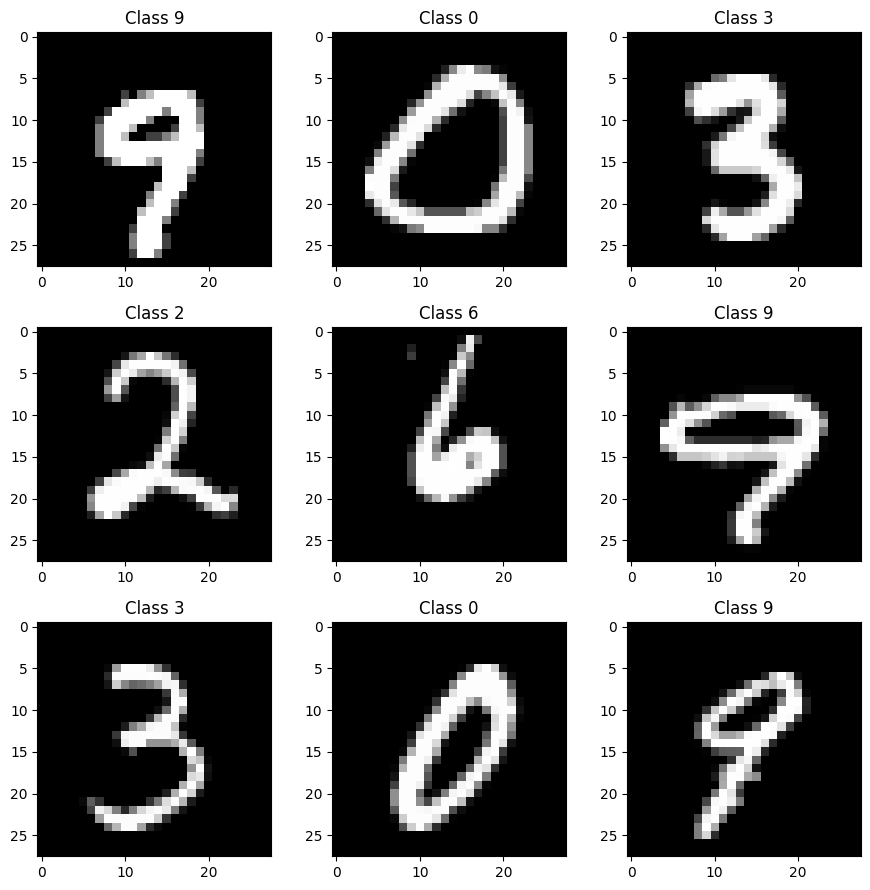

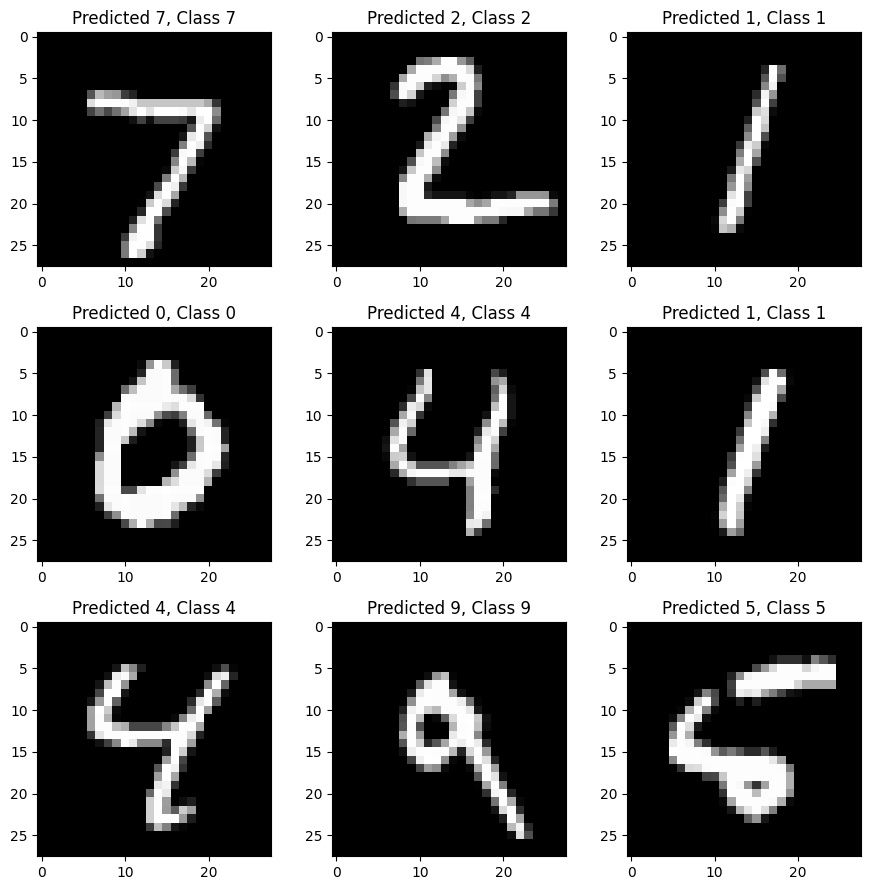

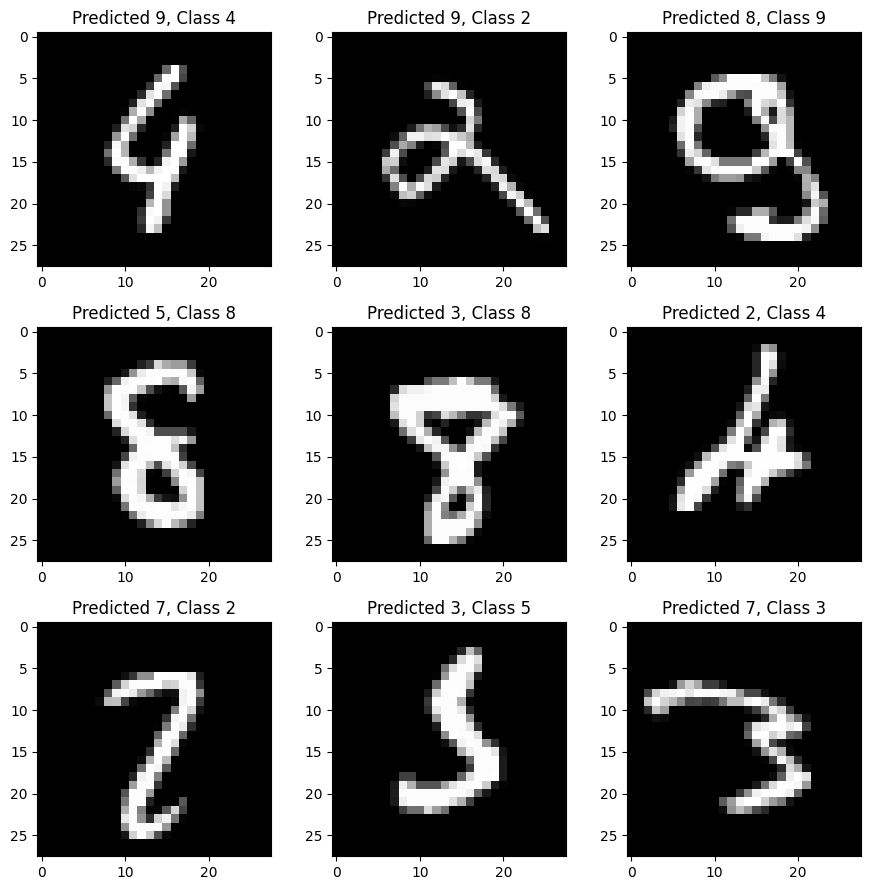

In [1]:
import numpy as np                   # advanced math library
import matplotlib.pyplot as plt      # MATLAB like plotting routines
import random                        # for generating random numbers
import tensorflow.keras.utils as np_utils

from keras.datasets import mnist     # MNIST dataset is included in Keras
from keras.models import Sequential  # Model type to be used

from keras.layers import Dense, Dropout, Activation # Import layers directly from keras.layers
from keras.utils import to_categorical                     # NumPy related tools

(X_train, y_train), (X_test, y_test) = mnist.load_data()

plt.rcParams['figure.figsize'] = (9,9) # Make the figures a bit bigger

for i in range(9):
    plt.subplot(3,3,i+1)
    num = random.randint(0, len(X_train))
    plt.imshow(X_train[num], cmap='gray', interpolation='none')
    plt.title("Class {}".format(y_train[num]))

plt.tight_layout()

X_train = X_train.reshape(60000, 784) # reshape 60,000 28 x 28 matrices into 60,000 784-length vectors.
X_test = X_test.reshape(10000, 784)   # reshape 10,000 28 x 28 matrices into 10,000 784-length vectors.

X_train = X_train.astype('float32')   # change integers to 32-bit floating point numbers
X_test = X_test.astype('float32')

X_train /= 255                        # normalize each value for each pixel for the entire vector for each input
X_test /= 255

nb_classes = 10 # number of unique digits

Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

model = Sequential()

model.add(Dense(512, input_shape=(784,)))

model.add(Activation('relu'))

model.add(Dropout(0.2))

model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(10))
model.add(Activation('softmax'))
model.summary()

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X_train, Y_train,
          batch_size=128, epochs=5,
          verbose=1)

# Use model.predict to get probabilities for each class
predicted_probabilities = model.predict(X_test)

# Get the class with the highest probability
predicted_classes = np.argmax(predicted_probabilities, axis=1)

# Check which items we got right / wrong
correct_indices = np.nonzero(predicted_classes == y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != y_test)[0]

plt.figure()
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_test[correct]))

plt.tight_layout()

plt.figure()
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], y_test[incorrect]))

plt.tight_layout()




## Problem 2: Hidden Layer Visualization & Analysis (40 points)

**Objective**:
In this problem you will explore what happens “inside” the MNIST model by extracting and visualizing the activations of one or more hidden layers when processing an input image. You will then relate these observations to neurobiological ideas about feature detection in the brain.

**Tasks**:

1. Extract Intermediate Activations:

Modify the MNIST model (or create a sub-model) to output the activations from at least one convolutional layer.
Feed the digit image obtained from Problem 1 into this model.

2. Visualization:

Use visualization libraries (e.g., Matplotlib) to plot the activation maps.

Create clear subplots to show how different filters respond to the input.

3. Analysis & Neurobiological Discussion:

Discuss what kinds of features the early convolutional layers appear to detect (e.g., edges, corners).

Compare these features with what is known about the receptive fields in the human visual cortex (for example, simple cells in V1).

Write a short explanation (150–300 words) linking the role of these hidden layers to biological processes in visual perception.

## Problem 4: Adversarial Example Generation & Robustness Analysis (20 points)

**Objective**:
This advanced problem invites you to probe the robustness of your MNIST model by generating adversarial examples. You will introduce a slight, carefully crafted perturbation to an input image to cause the model to misclassify it. Finally, you will discuss the implications of such vulnerabilities and draw parallels to biological perceptual phenomena.

**Tasks**:

1. Understanding the Concept:

Read a brief introduction on adversarial examples and the Fast Gradient Sign Method (FGSM). In FGSM, small perturbations are added to the input image in the direction that increases the model's loss, potentially leading to misclassification.

2. Implementing FGSM:

Use your loaded or trained MNIST model and select an input image (from Problem 1).

Compute the gradient of the loss with respect to the input image.

Generate an adversarial perturbation by taking the sign of this gradient and multiplying it by a small factor (epsilon). For example, choose epsilon = 0.1.

Create the adversarial image by adding this perturbation to the original image.

3. Evaluating the Model:

Use your model to predict the digit for both the original and adversarial images.

Display both images side-by-side along with their predicted labels.

4. Analysis & Neurobiological Discussion:

Write a brief discussion (200–400 words) addressing:
* How a small perturbation can lead to a significant change in prediction.
* What this suggests about the model’s decision boundaries and robustness.
* Analogies to biological systems—for instance, discuss how human perception can sometimes be tricked by optical illusions or minimal changes in stimuli.
* Reflect on the potential implications for both machine learning and neuroscience research.


*Hint*: If you are using TensorFlow, you might leverage a gradient tape as follows:

In [ ]:
import tensorflow as tf
import numpy as np

# Assume 'model' is your MNIST model and 'image' is your input image with shape (1, 28, 28, 1)
image = tf.convert_to_tensor(image_for_model)

# Choose a target label if desired, or use the original label for untargeted attack
original_label = tf.convert_to_tensor([true_label])

# Set epsilon (perturbation magnitude)
epsilon = 0.1

# Use a gradient tape to compute gradients with respect to the input image
with tf.GradientTape() as tape:
    tape.watch(image)
    prediction = model(image)
    loss = tf.keras.losses.sparse_categorical_crossentropy(original_label, prediction)

# Get the gradients of the loss with respect to the input image
gradient = tape.gradient(loss, image)

# Compute the sign of the gradients to create the perturbation
perturbation = epsilon * tf.sign(gradient)

# Generate the adversarial image
adv_image = image + perturbation
adv_image = tf.clip_by_value(adv_image, 0.0, 1.0)  # Ensure the pixel values remain valid
